# Function Testing Notebook (Windows) - Joseph

This notebook is meant to test external-facing functions to ensure they are working as expected.

A dedicated test_all_functions.py with unit testing might be better, but this is a good benchmark

In [1]:
import sys
from pathlib import Path
import time
import tempfile
import logging

import numpy as np
import matplotlib.pyplot as plt
import mne
import matplotlib.colors as colors


In [2]:
packageroot = Path('../../').resolve()
print(packageroot)
sys.path.append(str(packageroot))

from pythoneeg import core
from pythoneeg import visualization
# from pythoneeg import constants

print(core.__all__)
# print(visualization.__all__)
# print(dir(constants))

C:\Users\User\source-code\PyEEG


c:\Users\User\source-code\PyEEG\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['DDFBinaryMetadata', 'LongRecordingOrganizer', 'convert_ddfcolbin_to_ddfrowbin', 'convert_ddfrowbin_to_si', 'convert_units_to_multiplier', 'convert_colpath_to_rowpath', 'filepath_to_index', 'is_day', 'set_temp_directory', 'get_temp_directory', 'parse_path_to_animalday', 'parse_path_to_genotype', 'parse_path_to_animal', 'parse_path_to_day', 'parse_chname_to_abbrev', 'nanaverage', 'LongRecordingAnalyzer', 'MountainSortAnalyzer', 'FragmentAnalyzer']


In [3]:
core.utils.set_temp_directory(str(packageroot / 'tmp'))

In [4]:
tmpmet = core.DDFBinaryMetadata(packageroot / Path(r'notebooks\tests\test-data\A10 KO 12_13_2023\Cage 2 A10-0_Meta.csv'))
print(tmpmet.dt_end.ctime())
display(tmpmet.channel_names)

Wed Dec 13 11:17:32 2023


['Intan Input (1)/PortC C-009',
 'Intan Input (1)/PortC C-010',
 'Intan Input (1)/PortC C-012',
 'Intan Input (1)/PortC C-014',
 'Intan Input (1)/PortC C-015',
 'Intan Input (1)/PortC C-016',
 'Intan Input (1)/PortC C-017',
 'Intan Input (1)/PortC C-019',
 'Intan Input (1)/PortC C-021',
 'Intan Input (1)/PortC C-022']

In [5]:
data_folder = Path('./test-data').resolve()
lrec = core.LongRecordingOrganizer(base_folder_path= data_folder / 'A10 KO 12_13_2023',
                                    truncate=3)
lrec.convert_colbins_to_rowbins(overwrite=False)
lrec.convert_rowbins_to_rec()

C:\Users\User\source-code\PyEEG\pythoneeg\core\core.py:153: UserWarning: truncate = True. Only the first 3 files of each animal will be used
  warnings.warn(f"truncate = True. Only the first {self.n_truncate} files of each animal will be used")


In [6]:
Path('./test-wars/A5').resolve()

WindowsPath('C:/Users/User/source-code/PyEEG/notebooks/tests/test-wars/A5')

In [7]:
from dask.distributed import LocalCluster, Client

# Start a local cluster with 3 worker nodes
cluster = LocalCluster(n_workers=3, 
                       processes=True, 
                       threads_per_worker=1, 
                    #    memory_limit='1G',
                       )
# cluster = LocalCluster(n_workers=3, threads_per_worker=2, memory_limit='1G')
# cluster = LocalCluster(n_workers=3, threads_per_worker=3, memory_limit='1G')
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 3
Total threads: 3,Total memory: 31.70 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50606,Workers: 3
Dashboard: http://127.0.0.1:8787/status,Total threads: 3
Started: Just now,Total memory: 31.70 GiB
Comm: tcp://127.0.0.1:50624,Total threads: 1
Dashboard: http://127.0.0.1:50626/status,Memory: 10.57 GiB
Nanny: tcp://127.0.0.1:50609,


In [8]:
# animal_ids = ['A5', 'A10', 'F22', 'G25']
# animal_ids = ['A5']
animal_ids = ['A10']
# animal_ids = ['F22']
# animal_ids = ['G25']
base_folder = Path('./test-data').resolve()
# base_folder = Path('/mnt/isilon/marsh_single_unit/PythonEEG Data Bins').resolve()
for animal_id in animal_ids:
    ao = visualization.AnimalOrganizer(base_folder, animal_id, mode="concat", assume_from_number=True, truncate=1)
    ao.convert_colbins_to_rowbins(overwrite=False)
    ao.convert_rowbins_to_rec(multiprocess_mode='serial')

    war = ao.compute_windowed_analysis(['all'], multiprocess_mode='dask')
    # war.to_pickle_and_json(Path(f'./test-wars/{animal_id}').resolve())

    # sar = ao.compute_spike_analysis(multiprocess_mode='dask')
    

C:\Users\User\source-code\PyEEG\pythoneeg\core\core.py:153: UserWarning: truncate = True. Only the first 1 files of each animal will be used
  warnings.warn(f"truncate = True. Only the first {self.n_truncate} files of each animal will be used")


Converting row bins to recs: 100%|██████████| 1/1 [00:00<00:00, 17.49it/s]


Channel names: 	['Intan Input (1)/PortC C-009', 'Intan Input (1)/PortC C-010', 'Intan Input (1)/PortC C-012', 'Intan Input (1)/PortC C-014', 'Intan Input (1)/PortC C-015', 'Intan Input (1)/PortC C-016', 'Intan Input (1)/PortC C-017', 'Intan Input (1)/PortC C-019', 'Intan Input (1)/PortC C-021', 'Intan Input (1)/PortC C-022']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']


In [9]:
war.get_result(['all'], allow_missing=True)

,index,animalday,animal,day,genotype,duration,endfile,timestamp,isday,rms,ampvar,psd,psdtotal,psdband,psdfrac,psdslope,cohere,pcorr
0,0,A10 KO Dec-13-2023,A10,2023-12-13,KO,4.0,None,2023-12-13 11:15:31.640,True,"[45.94372, 79.14008, 35.041542, 72.76703, 49.0...","[2109.172, 6243.4824, 1227.7904, 5292.8623, 23...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[2147.5030118412465, 5669.320143562978, 1340.3...","{'delta': [1880.6408494145003, 2076.6261729215...","{'delta': [0.8757337424183906, 0.3662919221944...","[[-2.5185966792695975, 3.341601326474591], [-1...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1,A10 KO Dec-13-2023,A10,2023-12-13,KO,4.0,None,2023-12-13 11:15:35.640,True,"[17.386616, 104.45952, 17.702452, 87.68795, 40...","[300.913, 10911.759, 312.7414, 7676.2407, 1618...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[207.6821134359629, 10272.971777008579, 222.28...","{'delta': [113.76098938297639, 4511.0967970262...","{'delta': [0.5477649832278584, 0.4391228648288...","[[-1.9438679339547476, 2.3879885911962138], [-...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2,A10 KO Dec-13-2023,A10,2023-12-13,KO,4.0,None,2023-12-13 11:15:39.640,True,"[21.215885, 101.42181, 17.910995, 85.188, 48.4...","[448.86877, 10286.33, 319.65482, 7256.164, 234...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[350.0469866110478, 9338.498643173674, 208.830...","{'delta': [217.7492768576539, 3193.64854289847...","{'delta': [0.6220572814117793, 0.3419873648782...","[[-2.027278545130812, 2.5391352137794048], [-1...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3,A10 KO Dec-13-2023,A10,2023-12-13,KO,4.0,None,2023-12-13 11:15:43.640,True,"[16.12407, 86.00608, 14.081851, 77.030235, 47....","[258.85803, 7396.576, 197.52907, 5932.884, 224...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[205.4916480487485, 5804.641890753657, 162.615...","{'delta': [144.8385593070696, 2967.68896319986...","{'delta': [0.7048391537193266, 0.5112613351612...","[[-1.8806278588735041, 2.2425427781872616], [-...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,4,A10 KO Dec-13-2023,A10,2023-12-13,KO,4.0,None,2023-12-13 11:15:47.640,True,"[18.514677, 95.01188, 19.664534, 86.26501, 54....","[342.501, 9017.05, 386.6909, 7437.016, 2952.83...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[243.02335356635405, 8635.62314490714, 212.419...","{'delta': [179.50505469645486, 5810.3040725743...","{'delta': [0.7386329423169761, 0.6728297396813...","[[-1.9944330950828046, 2.390165805428064], [-1...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,5,A10 KO Dec-13-2023,A10,2023-12-13,KO,4.0,None,2023-12-13 11:15:51.640,True,"[23.877338, 95.443886, 23.73788, 80.194534, 50...","[568.7808, 9108.101, 562.67206, 6429.9507, 255...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[213.40820257414504, 7920.824495247417, 291.67...","{'delta': [120.49037335560443, 3713.2874509882...","{'delta': [0.5646004788112214, 0.4688006221090...","[[-1.8070772394751384, 2.220175828789261], [-1...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,6,A10 KO Dec-13-2023,A10,2023-12-13,KO,4.0,None,2023-12-13 11:15:55.640,True,"[17.575144, 114.5662, 16.79939, 84.01456, 37.3...","[308.21527, 13100.108, 281.65524, 7058.0405, 1...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[176.7535773353053, 12809.506971616327, 235.32...","{'delta': [105.51363576643743, 4303.0042947408...","{'delta': [0.5969533253987602, 0.3359227099275...","[[-1.8703938783467258, 2.251771783063832], [-1...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,7,A10 KO Dec-13-2023,A10,2023-12-13,K

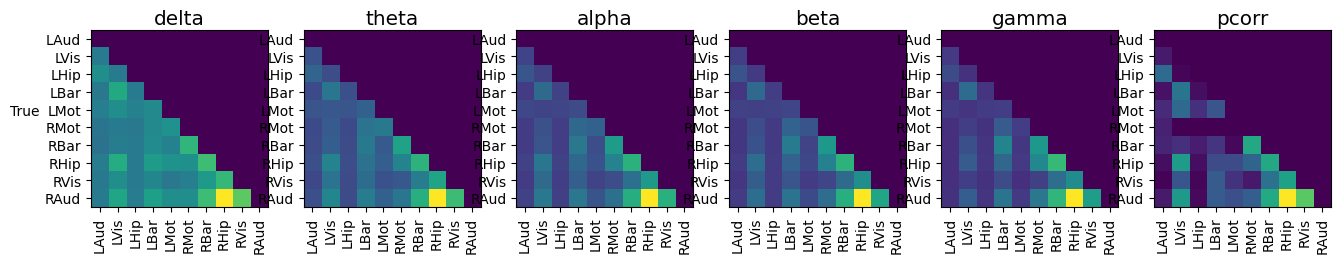

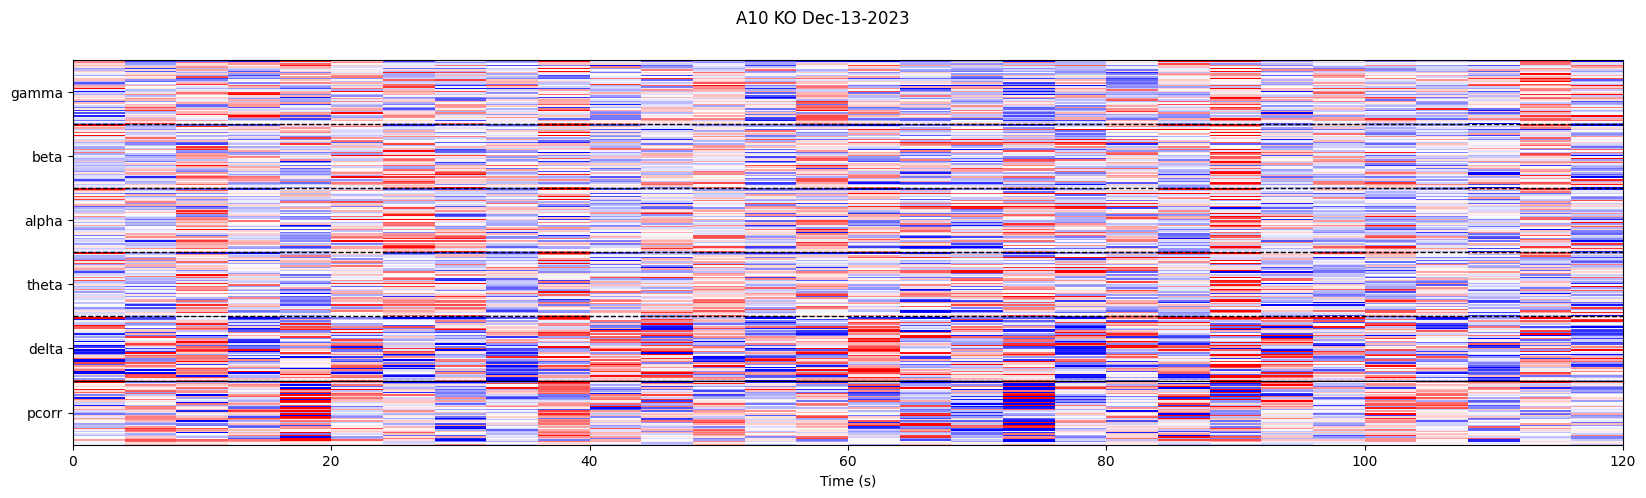

C:\Users\User\source-code\PyEEG\pythoneeg\visualization\plotting\animal.py:326: RuntimeWarning: divide by zero encountered in log10
  ax[0, i].plot(freqs, 10**(b + m * np.log10(freqs)), c=f'C{j}', alpha=0.75)


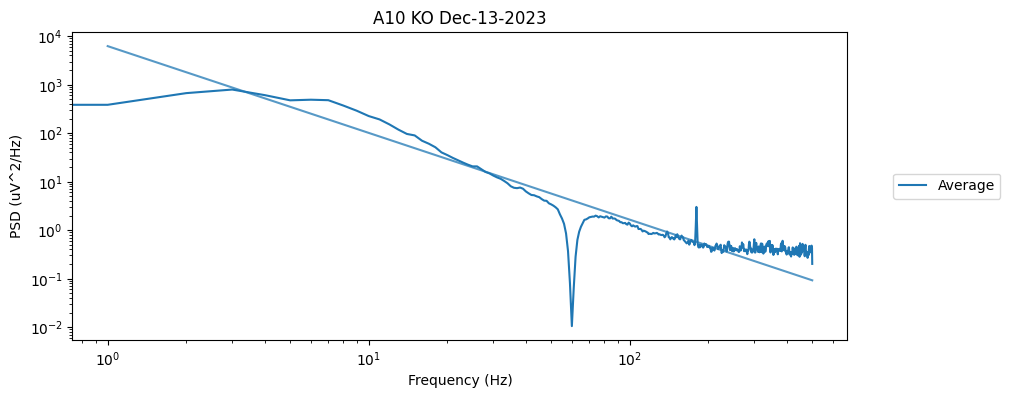

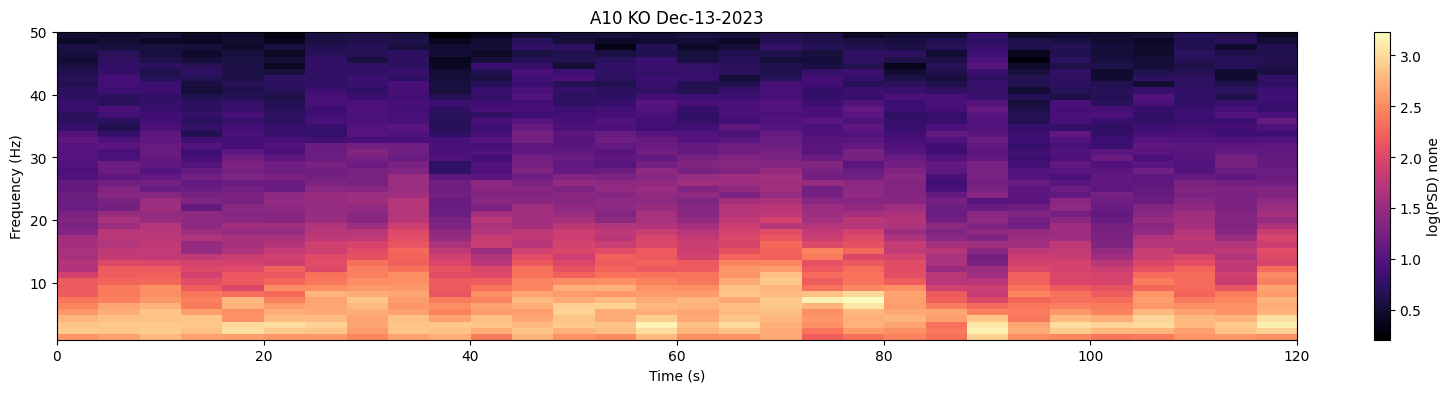

In [10]:
ap = visualization.AnimalPlotter(war)
ap.plot_coherecorr_matrix(['isday'], bands=None, figsize=(16,5), cmap='viridis')
# ap.plot_coherecorr_diff(['animalday'], bands=None, figsize=(16,5))
# ap.plot_linear_temporal(figsize=(20, 5), score_type='z', lw=1, channels=[0, 1])
# ap.plot_linear_temporal(['isday'], figsize=(20, 5), score_type='z', lw=1, channels=[0, 1, 2, 3])

# ap.plot_coherecorr_spectral(['isday'], figsize=(20, 5), score_type='center')

ap.plot_coherecorr_spectral(figsize=(20, 5), score_type='center')
ap.plot_psd_histogram(figsize=(10, 4), avg_channels=True, plot_type='loglog')
ap.plot_psd_spectrogram(figsize=(20, 4), mode='none')

In [11]:
wars = []
animal_ids = ['A10', 'F22']
for animal_id in animal_ids:
    war = visualization.WindowAnalysisResult.load_pickle_and_json(Path(f'./test-wars/{animal_id}').resolve())
    if animal_id == 'F22':
        war.filter_all(reject_channels=['LMot', 'RBar'])
    else:
        war.filter_all()
    wars.append(war)
ep = visualization.ExperimentPlotter(wars)

display(ep._pull_timeseries_dataframe('pcorr', ['isday', 'animal'], collapse_channels=True))

Channel names: 	['Intan Input (1)/PortC C-009', 'Intan Input (1)/PortC C-010', 'Intan Input (1)/PortC C-012', 'Intan Input (1)/PortC C-014', 'Intan Input (1)/PortC C-015', 'Intan Input (1)/PortC C-016', 'Intan Input (1)/PortC C-017', 'Intan Input (1)/PortC C-019', 'Intan Input (1)/PortC C-021', 'Intan Input (1)/PortC C-022']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']
Channel names: 	['Intan Input (1)/PortC C-009', 'Intan Input (1)/PortC C-010', 'Intan Input (1)/PortC C-012', 'Intan Input (1)/PortC C-014', 'Intan Input (1)/PortC C-015', 'Intan Input (1)/PortC C-016', 'Intan Input (1)/PortC C-017', 'Intan Input (1)/PortC C-019', 'Intan Input (1)/PortC C-021', 'Intan Input (1)/PortC C-022']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']
Channel names: 	['Intan Input (1)/PortD D-009', 'Intan Input (1)/PortD D-010', 'Intan Input (1)/PortD D-012', 'Intan Input (1)/PortD D-0

C:\Users\User\source-code\PyEEG\pythoneeg\visualization\plotting\experiment.py:127: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, tril_indices[0], tril_indices[1]], axis=-1)
C:\Users\User\source-code\PyEEG\pythoneeg\visualization\plotting\experiment.py:127: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, tril_indices[0], tril_indices[1]], axis=-1)


,isday,animal,channel,pcorr
0,True,A10,average,0.212559
1,True,A10,average,0.271361
2,True,A10,average,0.192729
3,True,A10,average,0.222285
4,True,A10,average,0.300577
...,...,...,...,...
143,True,F22,average,0.380818
144,True,F22,average,NaN
145,True,F22,average,0.224501
146,True,F22,average,0.357296


In [12]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

DEBUG:root:groups: [('A10', 'KO'), ('F22', 'KO')]
DEBUG:root:vals.shape: (31, 5, 10, 10)
C:\Users\User\source-code\PyEEG\pythoneeg\visualization\plotting\experiment.py:142: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, :, tril_indices[0], tril_indices[1]], axis=-1)
DEBUG:root:vals.shape: (31, 5)
DEBUG:root:vals.shape: (117, 5, 10, 10)
C:\Users\User\source-code\PyEEG\pythoneeg\visualization\plotting\experiment.py:142: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, :, tril_indices[0], tril_indices[1]], axis=-1)
DEBUG:root:vals.shape: (117, 5)
DEBUG:statannotations._Plotter:rectangle width is larger than the typical group artist: 2.0
DEBUG:root:groups: ['A10 KO Dec-13-2023', 'F22 KO Dec-12-2023']
DEBUG:root:vals.shape: (31, 10)
DEBUG:root:vals.shape: (117, 10)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

F22_delta vs. F22_theta: Brunner-Munzel test, P_val:9.226e-01 W=9.744e-02


DEBUG:root:groups: [('A10', 'KO'), ('F22', 'KO')]
C:\Users\User\source-code\PyEEG\pythoneeg\visualization\plotting\experiment.py:113: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
DEBUG:root:vals.shape: (31, 5)
C:\Users\User\source-code\PyEEG\pythoneeg\visualization\plotting\experiment.py:113: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
DEBUG:root:vals.shape: (117, 5)
DEBUG:root:groups: [(True, 'A10 KO Dec-13-2023'), (True, 'F22 KO Dec-12-2023')]
DEBUG:root:vals.shape: (31, 10, 5)
DEBUG:root:vals.shape: (117, 10, 5)
DEBUG:root:groups: [(True, 'A10 KO Dec-13-2023'), (True, 'F22 KO Dec-12-2023')]
DEBUG:root:vals.shape: (31, 10, 5)
DEBUG:root:vals.shape: (117, 10, 5)
DEBUG:root:groups: [('A10 KO Dec-13-2023', 'KO'), ('F22 KO Dec-12-2023', 'KO')]
DEBUG:root:vals.shape: (31, 5, 10, 10)
DEBUG:root:vals.shape: (31, 5, 10, 10)
DEBUG:root:vals.shape: (117, 5, 10, 10)
DEBUG:root:vals.shape: (117, 5, 10, 10)
DEBUG:matplotlib.colorbar:locator: <mat

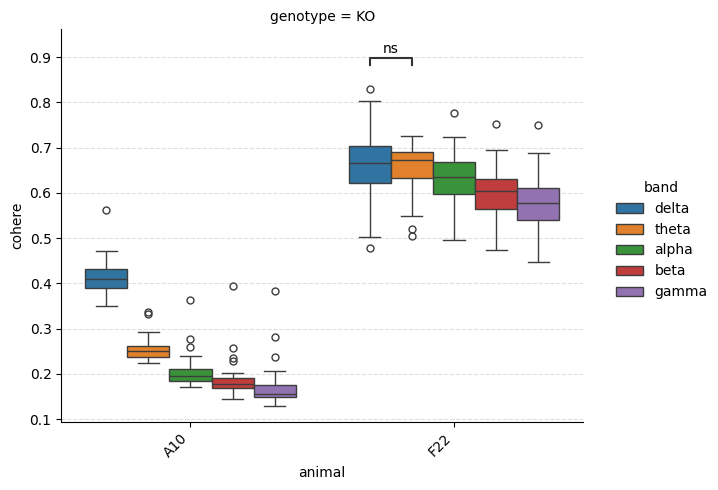

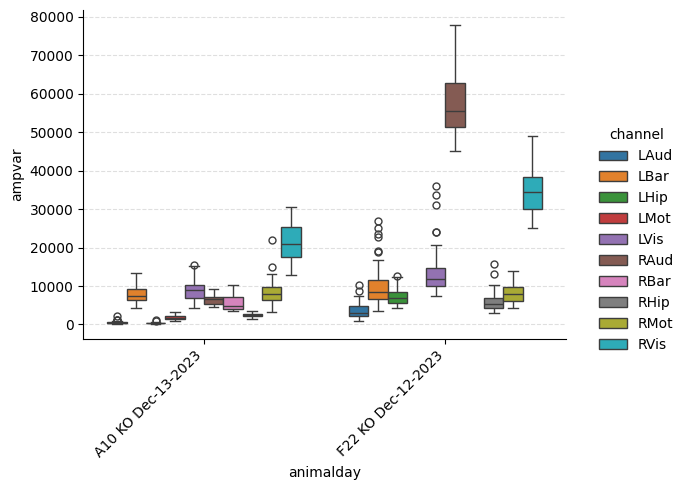

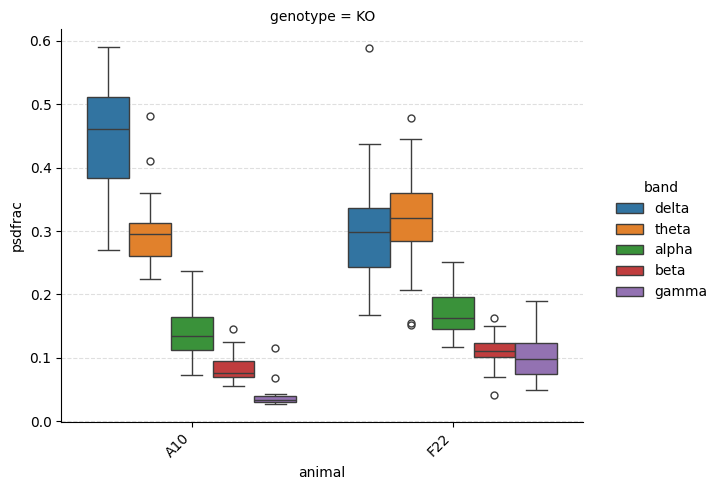

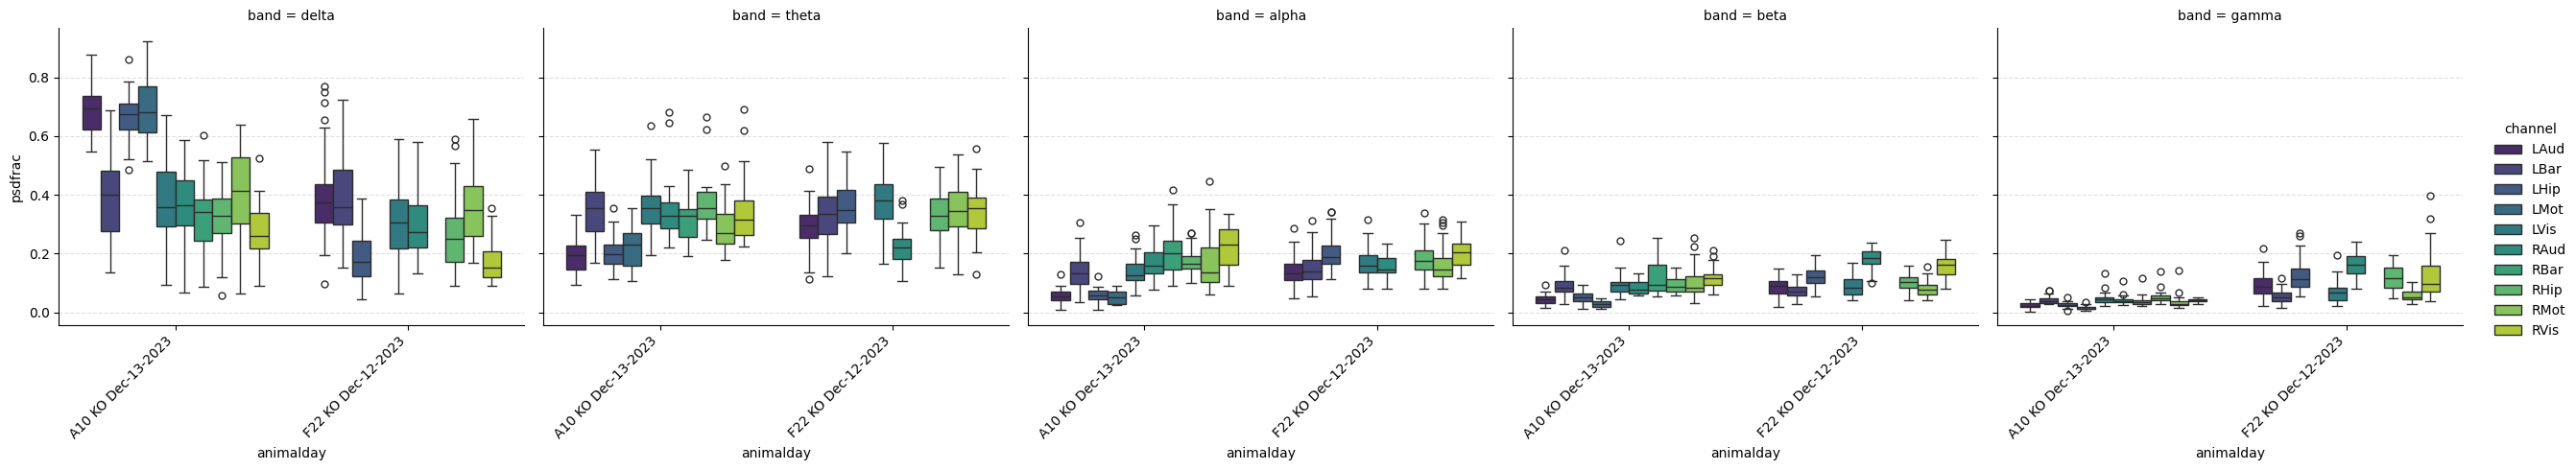

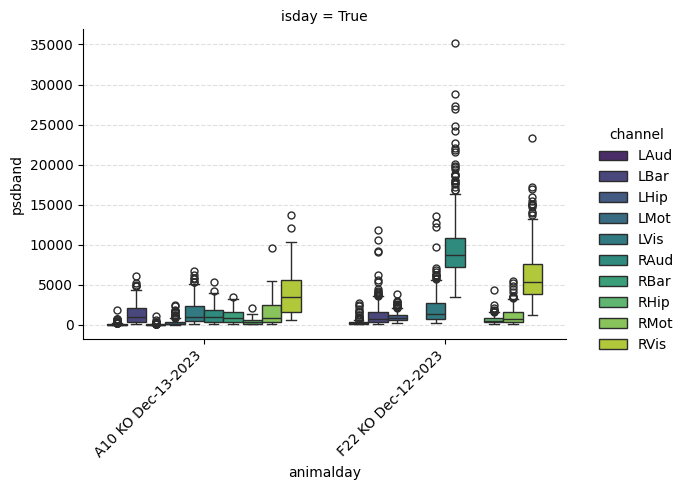

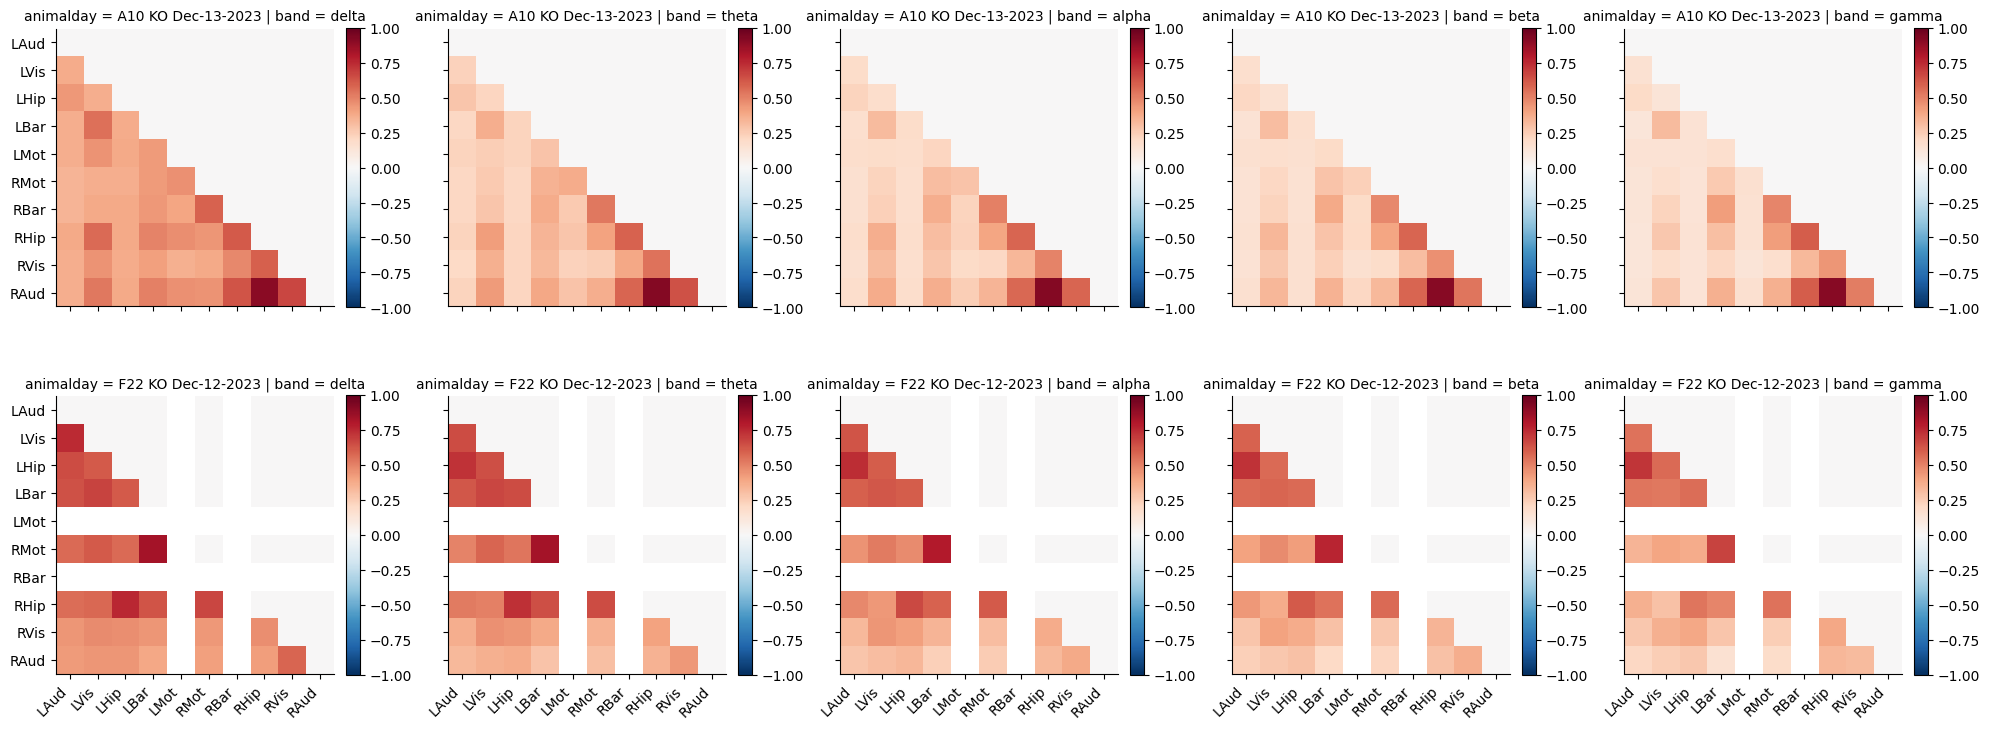

In [14]:
ep.plot_catplot('cohere', ['animal', 'genotype'], collapse_channels=True, hue='band', stat_pairs=[[('F22', 'delta'), ('F22', 'theta')]])
ep.plot_catplot('ampvar', ['animalday'])
ep.plot_catplot('psdfrac', ['animal', 'genotype'], collapse_channels=True, hue='band')
ep.plot_catplot('psdfrac', ['isday', 'animalday'], hue='channel', x='animalday', col='band', cmap='viridis')
ep.plot_catplot('psdband', ['isday', 'animalday'], hue='channel', x='animalday', col='isday', cmap='viridis')
ep.plot_matrixplot('cohere', ['animalday', 'genotype'], col='band', row='animalday')

In [ ]:
raise Exception("stop")

Exception: stop

In [14]:
# sar[0].result
# visualization.SpikeAnalysisResult.convert_sas_to_mne(sar[0].result)

In [15]:
def analyze_peri_spike_tfr(mne_obj, tmin=-10, tmax=10, l_freq=0.1, h_freq=100):
    """
    Analyze time-frequency representation around spikes from an MNE object.
    
    Parameters:
    -----------
    mne_obj : mne.io.Raw
        The MNE object containing the data and spike annotations
    tmin : float
        Start time relative to spike (in seconds)
    tmax : float
        End time relative to spike (in seconds)
    l_freq : float
        Lower frequency bound for filtering
    h_freq : float
        Upper frequency bound for filtering
    """
    raw = mne_obj.copy()
    events, event_dict = mne.events_from_annotations(raw=raw)
    
    # Common parameters for epoch creation
    epoch_params = {
        'raw': raw,
        'preload': True,
        'baseline': None,
        'event_repeated': 'drop'
    }
    
    # Process each spike type separately
    for unit_id in event_dict.keys():
        print(f"Processing unit: {unit_id}")
        
        # Create spike-centered epochs
        epochs_spike = mne.Epochs(
            **epoch_params,
            event_id={unit_id: event_dict[unit_id]},
            tmin=tmin,
            tmax=tmax
        )
        epochs_spike.filter(l_freq=l_freq, h_freq=h_freq)
        fig = mne.viz.plot_epochs_image(epochs_spike, picks=list(range(len(raw.ch_names))), show=False) # Do not combine channels
        plt.show()
        
        # Create baseline epochs from whole recording
        epochs_baseline = mne.make_fixed_length_epochs(
            raw, 
            duration=tmax-tmin,
            preload=True
        )
        epochs_baseline.filter(l_freq=l_freq, h_freq=h_freq)
        
        # Ensure we have comparable numbers of epochs
        n_epochs = min(len(epochs_spike), len(epochs_baseline))
        if n_epochs < 1:
            print(f"No valid epochs for unit {unit_id}")
            continue
            
        epochs_spike = epochs_spike[:n_epochs]
        epochs_baseline = epochs_baseline[:n_epochs]
        
        # Compute time-frequency representation
        tfr_params = dict(
            freqs=np.arange(l_freq, h_freq, 1),
            n_cycles=np.arange(l_freq, h_freq, 1) * 2,
            method='multitaper',
            use_fft=True,
            average=True
        )
        
        print("Computing TFR...")
        tfr_spike = epochs_spike.compute_tfr(**tfr_params)
        tfr_baseline = epochs_baseline.compute_tfr(**tfr_params)
        
        # Plot the results
        plot_tfr_ratio(tfr_spike, tfr_baseline)
        
        return tfr_spike, tfr_baseline

def plot_tfr_ratio(tfr_spike, tfr_baseline):
    """Plot the ratio between spike and baseline TFR."""
    pow_baseline = np.mean(tfr_baseline.get_data(), axis=(0, 2))
    pow_baseline = pow_baseline[:, np.newaxis]
    pow_spike, plot_t, plot_f = tfr_spike.get_data(return_times=True, return_freqs=True)
    pow_spike = np.mean(pow_spike, axis=0)
    pow_ratio = pow_spike / pow_baseline
    
    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    im = ax.imshow(pow_ratio, aspect='auto',
                   extent=[plot_t[0], plot_t[-1], plot_f[0], plot_f[-1]],
                   origin='lower',
                   cmap=plt.cm.RdBu_r,
                   norm=colors.TwoSlopeNorm(vmin=0.5, vcenter=1, vmax=10))
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    ax.axvline(0, color='black', linestyle='--')
    plt.colorbar(im, ax=ax, label='Power Ratio (spike/baseline)')
    plt.show()


In [16]:
# Example usage:
mne_obj: mne.io.RawArray = visualization.SpikeAnalysisResult.convert_sas_to_mne(sar[0].result_sas)

NameError: name 'sar' is not defined

Used Annotations descriptions: [np.str_('Intan Input (1)/PortB L Aud Ctx'), np.str_('Intan Input (1)/PortB L Barrel'), np.str_('Intan Input (1)/PortB L Hipp'), np.str_('Intan Input (1)/PortB L Motor'), np.str_('Intan Input (1)/PortB L Vis Ctx'), np.str_('Intan Input (1)/PortB R Aud Ctx'), np.str_('Intan Input (1)/PortB R Barrel'), np.str_('Intan Input (1)/PortB R Hipp'), np.str_('Intan Input (1)/PortB R Motor'), np.str_('Intan Input (1)/PortB R Vis Ctx')]


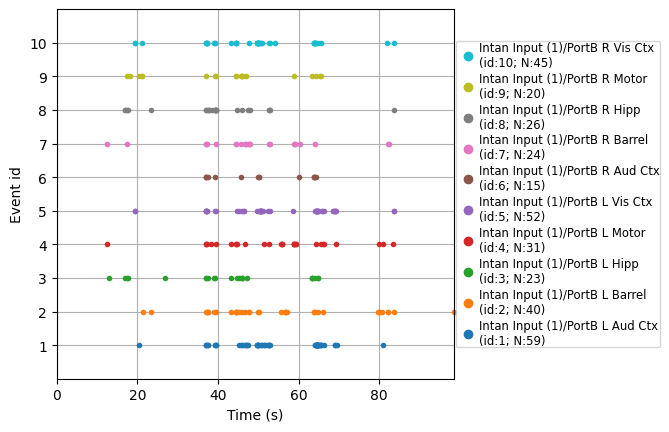

In [24]:
events = mne.events_from_annotations(raw=mne_obj)

fig = mne.viz.plot_events(events[0], sfreq=mne_obj.info['sfreq'], first_samp=mne_obj.first_samp, event_id=events[1])


Used Annotations descriptions: [np.str_('Intan Input (1)/PortB L Aud Ctx'), np.str_('Intan Input (1)/PortB L Barrel'), np.str_('Intan Input (1)/PortB L Hipp'), np.str_('Intan Input (1)/PortB L Motor'), np.str_('Intan Input (1)/PortB L Vis Ctx'), np.str_('Intan Input (1)/PortB R Aud Ctx'), np.str_('Intan Input (1)/PortB R Barrel'), np.str_('Intan Input (1)/PortB R Hipp'), np.str_('Intan Input (1)/PortB R Motor'), np.str_('Intan Input (1)/PortB R Vis Ctx')]
Processing unit: Intan Input (1)/PortB L Aud Ctx
Used Annotations descriptions: [np.str_('Intan Input (1)/PortB L Aud Ctx'), np.str_('Intan Input (1)/PortB L Barrel'), np.str_('Intan Input (1)/PortB L Hipp'), np.str_('Intan Input (1)/PortB L Motor'), np.str_('Intan Input (1)/PortB L Vis Ctx'), np.str_('Intan Input (1)/PortB R Aud Ctx'), np.str_('Intan Input (1)/PortB R Barrel'), np.str_('Intan Input (1)/PortB R Hipp'), np.str_('Intan Input (1)/PortB R Motor'), np.str_('Intan Input (1)/PortB R Vis Ctx')]
Not setting metadata
59 matchin

C:\Users\User\AppData\Local\Temp\ipykernel_60368\2488369046.py:40: RuntimeWarning: filter_length (33001) is longer than the signal (2001), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_spike.filter(l_freq=l_freq, h_freq=h_freq)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s


Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
59 matching events found


C:\Users\User\AppData\Local\Temp\ipykernel_60368\2488369046.py:41: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  fig = mne.viz.plot_epochs_image(epochs_spike, picks=list(range(len(raw.ch_names))), show=False) # Do not combine channels
C:\Users\User\AppData\Local\Temp\ipykernel_60368\2488369046.py:41: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  fig = mne.viz.plot_epochs_image(epochs_spike, picks=list(range(len(raw.ch_names))), show=False) # Do not combine channels
C:\Users\User\AppData\Local\Temp\ipykernel_60368\2488369046.py:41: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  fig = mne.viz.plot_epochs_image(epochs_spike, picks=list(range(len(raw.ch_names))), show=False) # Do not combine channels
C:\Users\User\AppData\Local\Temp\ipykernel_60368\2488369046.py:41: RuntimeWarning: Cannot find channel coordinates 

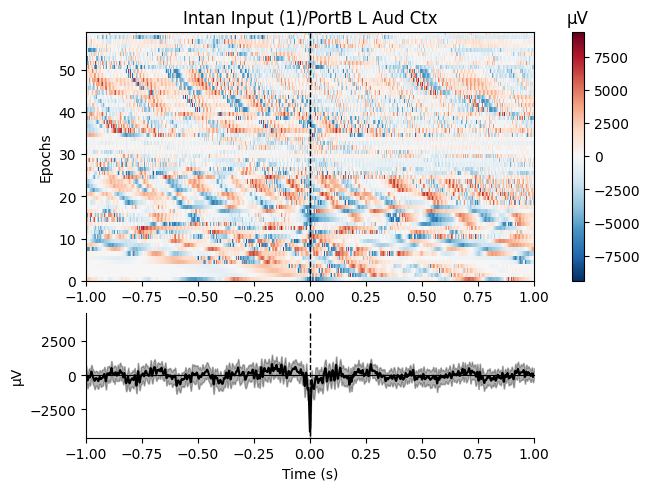

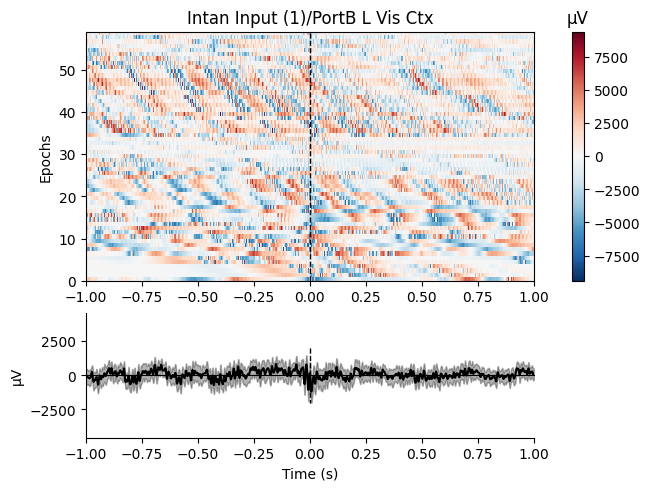

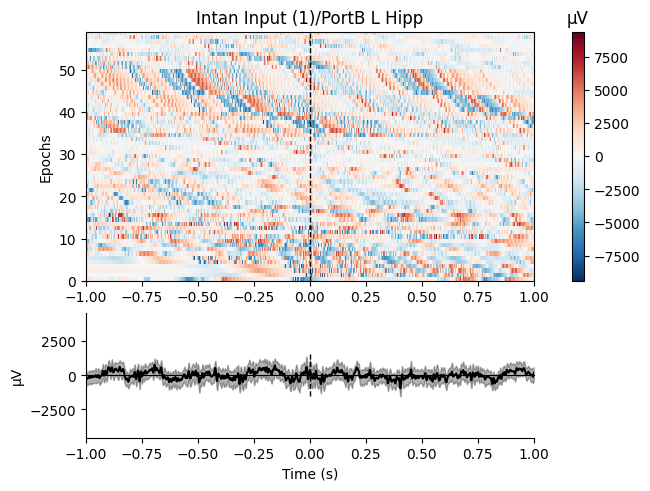

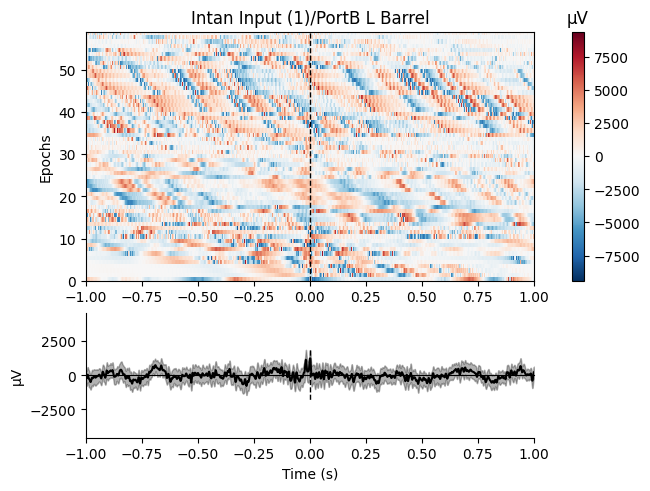

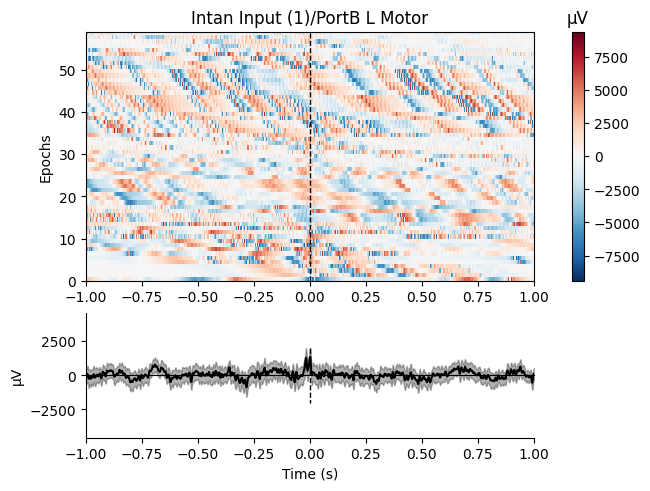

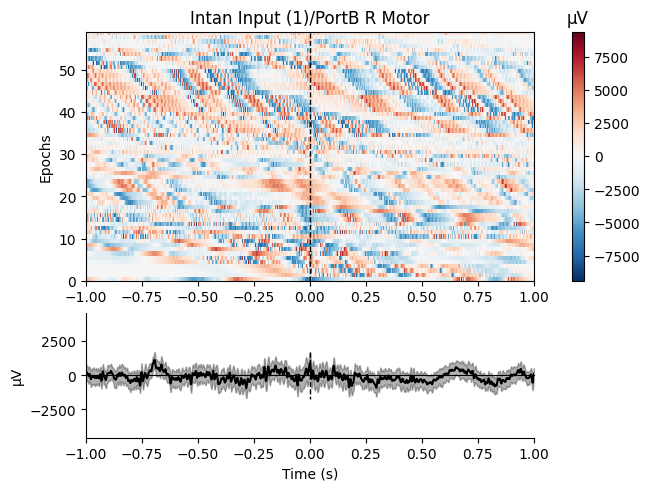

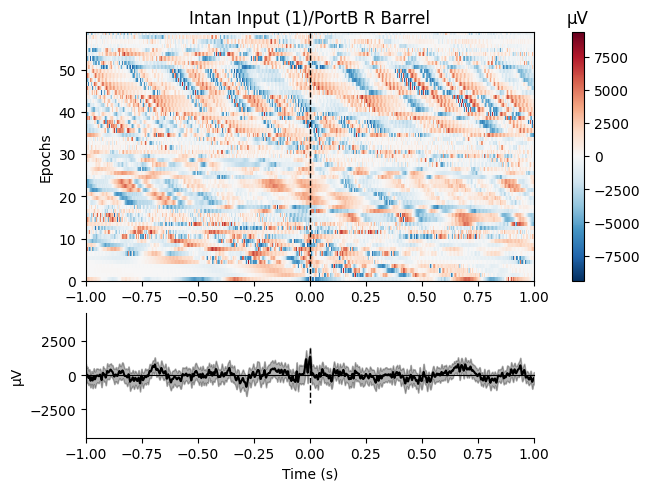

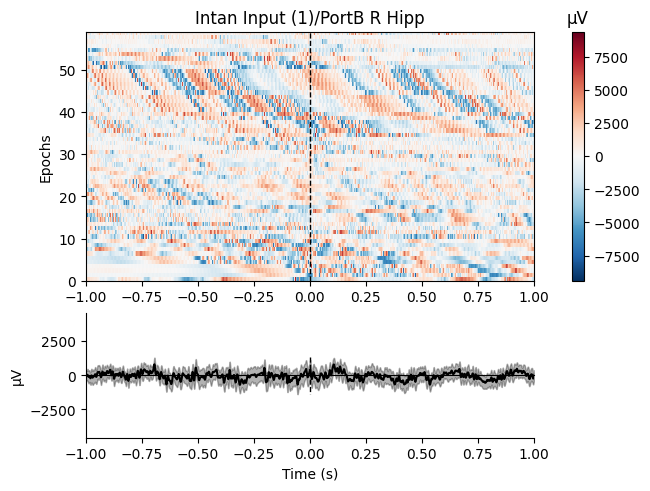

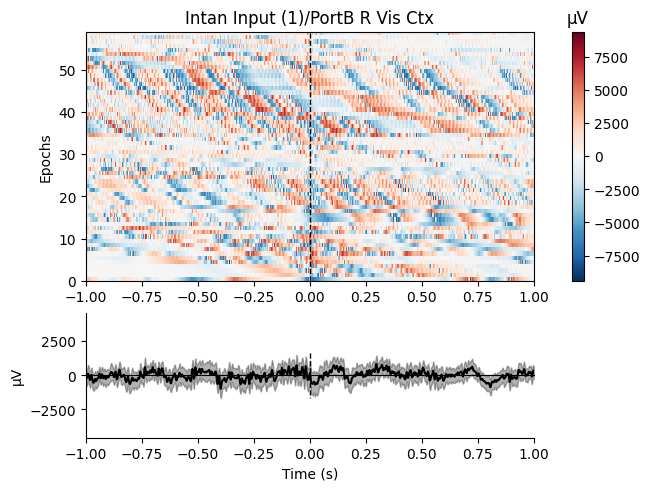

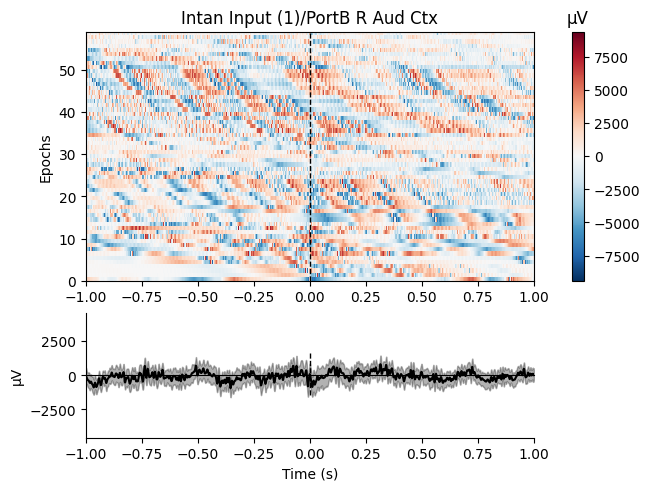

Not setting metadata
233 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 233 events and 2000 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 33001 samples (33.001 s)



C:\Users\User\AppData\Local\Temp\ipykernel_60368\2488369046.py:50: RuntimeWarning: filter_length (33001) is longer than the signal (2000), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_baseline.filter(l_freq=l_freq, h_freq=h_freq)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    2.1s


Computing TFR...


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-285' coro=<Client._gather.<locals>.wait() done, defined at c:\Users\User\source-code\PyEEG\.venv\lib\site-packages\distributed\client.py:2394> exception=AllExit()>
Traceback (most recent call last):
  File "c:\Users\User\source-code\PyEEG\.venv\lib\site-packages\distributed\client.py", line 2403, in wait
    raise AllExit()
distributed.client.AllExit
ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-287' coro=<Client._gather.<locals>.wait() done, defined at c:\Users\User\source-code\PyEEG\.venv\lib\site-packages\distributed\client.py:2394> exception=AllExit()>
Traceback (most recent call last):
  File "c:\Users\User\source-code\PyEEG\.venv\lib\site-packages\distributed\client.py", line 2403, in wait
    raise AllExit()
distributed.client.AllExit
ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-291' coro=<Client._gather.<locals>.wait() don

KeyboardInterrupt: 

In [25]:
tfr_spike, tfr_baseline = analyze_peri_spike_tfr(mne_obj, tmin=-1, tmax=1)